In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# カレントディレクトリを.pyと合わせるために以下を実行
from pathlib import Path
if Path.cwd().name == "notebook":
    os.chdir("..")


# 設定
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 500)
pd.set_option('display.max_columns', 500)

In [27]:
# Mac Matplotlibのデフォルトフォントをヒラギノ角ゴシックに設定
plt.rcParams['font.family'] = 'Hiragino Sans'

In [ ]:
# Windows Matplotlibのデフォルトフォントをヒラギノ角ゴシックに設定
plt.rcParams['font.family'] = 'Meiryo'

In [28]:
# CSVファイルを読み込む
file_path = 'data/input/user_info_cleansing.csv'  # ファイルパスを適切に設定してください
data = pd.read_csv(file_path)

In [29]:
data.describe()

,Unnamed: 0,id,club_coin,recycle_point,total_recycle_amount,recycle_amount_per_year,recycle_amount_after_gold_member,rank_continuation_class,zipcode
count,74570.000000,74570.000000,74570.000000,74570.000000,74570.000000,74570.000000,74570.000000,74570.000000,7.178400e+04
mean,50796.097492,51753.180622,968.078451,17.275707,152.608162,97.814748,2.815860,0.382741,7.576628e+06
std,28667.793018,30599.215687,1182.322233,63.504919,248.849782,164.277692,15.175556,0.774629,3.116695e+06
min,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000006e+06
25%,26149.250000,24349.250000,83.000000,0.000000,35.000000,23.000000,0.000000,0.000000,3.230062e+06
50%,51165.000000,51814.500000,549.000000,0.000000,94.000000,68.000000,0.000000,0.000000,9.650021e+06
75%,75624.750000,78556.750000,1612.000000,0.000000,194.000000,134.000000,0.000000,1.000000,9.830005e+06
max,99819.000000,105519.000000,59900.000000,3614.000000,16880.000000,15460.000000,149.699997,5.000000,9.999999e+06


In [30]:
data[data['club_coin'] == data['club_coin'].max()]

,Unnamed: 0,id,nickname,club_coin,recycle_point,total_recycle_amount,recycle_amount_per_year,recycle_amount_after_gold_member,rank_continuation_class,gender,birth_day,zipcode
41335,56590,59008,サトウ,59900.0,0.0,15910.0,15460.0,0.0,0,男,1970-01-03 00:00:00,9650025.0


In [32]:
sorted_df = data.sort_values(by='club_coin', ascending=False)
sorted_df.head()

,Unnamed: 0,id,nickname,club_coin,recycle_point,total_recycle_amount,recycle_amount_per_year,recycle_amount_after_gold_member,rank_continuation_class,gender,birth_day,zipcode
41335,56590,59008,サトウ,59900.0,0.0,15910.0,15460.0,0.0,0,男,1970-01-03 00:00:00,9650025.0
14080,19502,233,ずらまる,51900.0,952.0,8090.0,2390.0,0.0,0,女,1977-08-05 00:00:00,9891321.0
7405,10548,1467,くまちゃん,39740.0,115.0,7244.0,2266.0,0.0,0,女,1962-12-08 00:00:00,NaN
7199,10300,1444,ミィ,37470.0,135.0,5424.0,1509.0,0.0,0,女,1980-08-28 00:00:00,NaN
58949,79632,8130,ポイントゲッター,33180.0,0.0,7144.0,6916.0,0.0,0,男,1963-03-07,3210951.0


In [36]:
# birth_dayをdatetimeに変換し、年代を計算
data['birth_day'] = pd.to_datetime(data['birth_day'], errors='coerce')
current_year = pd.Timestamp.now().year
data['age'] = current_year - data['birth_day'].dt.year

# 年齢を年代に変換
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

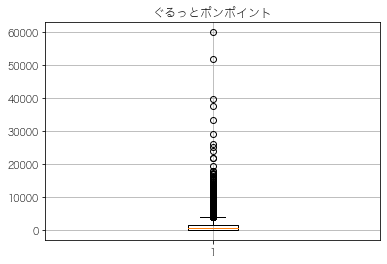

In [33]:
fig, ax = plt.subplots()
bp = ax.boxplot(data['club_coin'])
plt.title('ぐるっとポンポイント')
plt.grid() # 横線ラインを入れることができます。
# 描画
plt.show()

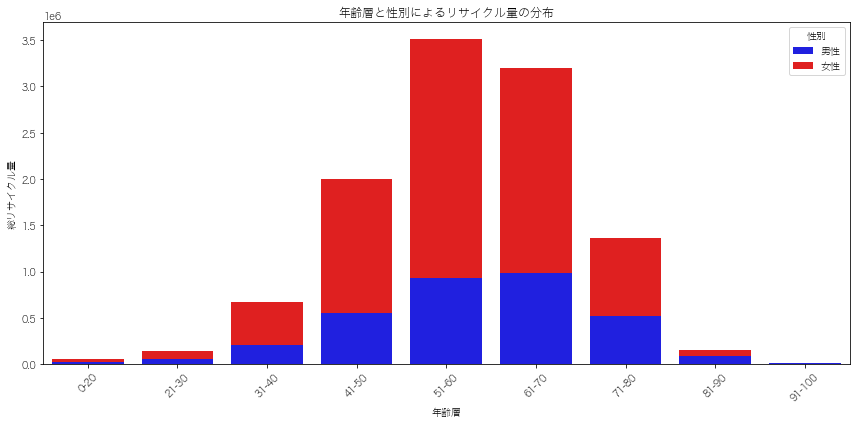

In [34]:
# 誕生日をdatetime形式に変換し、年齢を計算
data['birth_day'] = pd.to_datetime(data['birth_day'], errors='coerce')
current_year = datetime.now().year
data['age'] = current_year - data['birth_day'].dt.year

# 年齢と性別が欠損している行を削除
data_age_gender = data.dropna(subset=['age', 'gender']).copy()

# 年齢をグループに分ける
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50',
          '51-60', '61-70', '71-80', '81-90', '91-100']
data_age_gender['age_group'] = pd.cut(
    data_age_gender['age'], bins=bins, labels=labels, right=False)

# 年齢層と性別に基づいてリサイクル量を集計
grouped_data = data_age_gender.groupby(['age_group', 'gender'])[
    'total_recycle_amount'].sum().unstack()

# 棒グラフを描画
plt.figure(figsize=(12, 6))
sns.barplot(x=grouped_data.index,
            y=grouped_data['男'], color='blue', label='男性')
sns.barplot(x=grouped_data.index,
            y=grouped_data['女'], color='red', label='女性', bottom=grouped_data['男'])
plt.xlabel('年齢層')
plt.ylabel('総リサイクル量')
plt.title('年齢層と性別によるリサイクル量の分布')
plt.legend(title='性別')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


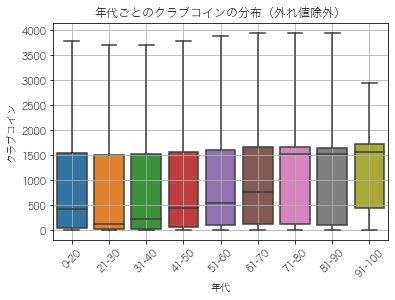

In [37]:
# 箱ひげ図を描画（外れ値を除外）
fig, ax = plt.subplots()
sns.boxplot(x='age_group', y='club_coin', data=data, showfliers=False)
plt.title('年代ごとのクラブコインの分布（外れ値除外）')
plt.xlabel('年代')
plt.ylabel('クラブコイン')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
